In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load all CSV files
financial_df = pd.read_csv("D:/SkygenAI/finanical_information.csv")
client_df = pd.read_csv("D:/SkygenAI/industry_client_details.csv")
payment_df = pd.read_csv("D:/SkygenAI/payment_information.csv")
subscription_df = pd.read_csv("D:/SkygenAI/subscription_information.csv")


In [16]:
# Convert date columns to datetime format
financial_df['start_date'] = pd.to_datetime(financial_df['start_date'])
financial_df['end_date'] = pd.to_datetime(financial_df['end_date'])
subscription_df['start_date'] = pd.to_datetime(subscription_df['start_date'])
subscription_df['end_date'] = pd.to_datetime(subscription_df['end_date'])
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'])

In [18]:
# Display first 5 rows of each file for our references
financial_df.head(), client_df.head(), payment_df.head(), subscription_df.head()

(   Unnamed: 0  start_date    end_date  inflation_rate  gdp_growth_rate
 0           0  2018-01-01  2018-03-31            5.77             3.51
 1           1  2018-04-01  2018-06-30            1.17             2.15
 2           2  2018-07-01  2018-09-30            1.56             1.82
 3           3  2018-10-01  2018-12-31            2.78             2.43
 4           4  2019-01-01  2019-03-31            6.91             3.44,
     client_id company_size         industry   location
 0  4280387012        Large  Finance Lending     Mumbai
 1  2095513148        Small  Finance Lending    Chennai
 2  7225516707       Medium  Finance Lending  New Delhi
 3  8093537819        Large      Block Chain     Mumbai
 4  4387541014       Medium      Hyper Local   Banglore,
     client_id payment_date  amount_paid payment_method
 0  6292156167    9/16/2019        447.0  Bank Transfer
 1  7462725203    5/21/2018        379.7  Bank Transfer
 2  4698004907    9/11/2021        435.1          Check
 3  35

In [25]:
# QUESTION NO 1
# How many finance lending and blockchain clients does the organization have?

In [19]:
# Counting clients in 'Finance Lending' and 'Block Chain'
finance_clients = client_df[client_df['industry'] == 'Finance Lending'].shape[0]
blockchain_clients = client_df[client_df['industry'] == 'Block Chain'].shape[0]

print(f"Number of Finance Lending clients: {finance_clients}")
print(f"Number of Blockchain clients: {blockchain_clients}")


Number of Finance Lending clients: 22
Number of Blockchain clients: 25


In [ ]:
# QUESTION NO 2
# Which industry in the organization has the highest renewal rate?

C:\Users\ashok\AppData\Local\Temp\ipykernel_8476\1161799287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=renewal_rate.index, y=renewal_rate.values, palette='viridis')


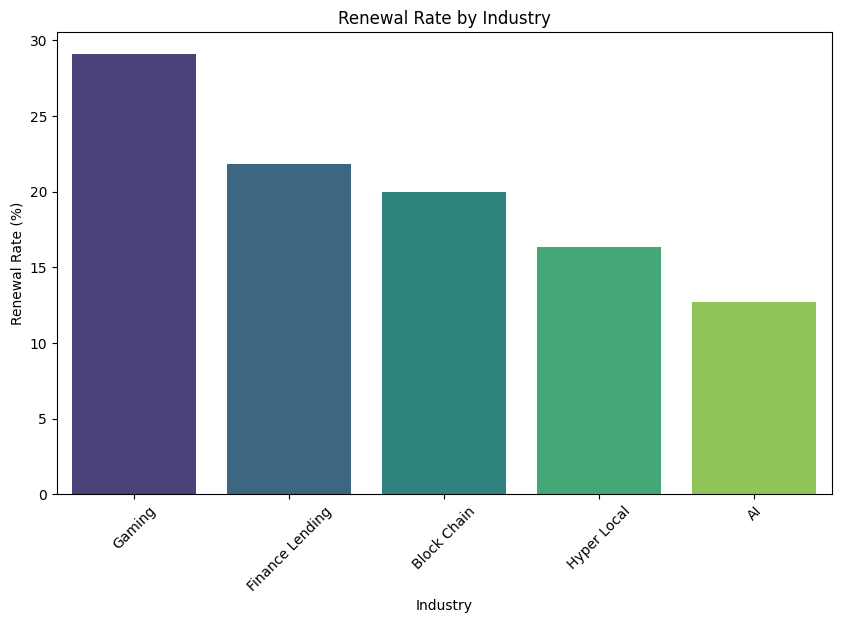

The industry with the highest renewal rate is: Gaming


In [20]:
# Filter only renewed subscriptions
renewed_df = subscription_df[subscription_df['renewed'] == True]

# Merge with client data to get industry information
renewed_clients_df = pd.merge(renewed_df, client_df, on='client_id', how='inner')

# Calculate renewal rate per industry
renewal_rate = renewed_clients_df['industry'].value_counts(normalize=True) * 100

# Plot renewal rate by industry
plt.figure(figsize=(10, 6))
sns.barplot(x=renewal_rate.index, y=renewal_rate.values, palette='viridis')
plt.title('Renewal Rate by Industry')
plt.xlabel('Industry')
plt.ylabel('Renewal Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Industry with highest renewal rate
top_renewed_industry = renewal_rate.idxmax()
print(f"The industry with the highest renewal rate is: {top_renewed_industry}")


In [ ]:
# QUESTION NO 3
# What was the average inflation rate when their subscriptions were renewed?

In [21]:
# Filter renewed subscriptions
renewed_sub_df = subscription_df.loc[subscription_df['renewed'] == True].copy()

# Check which financial data period matches subscription end_date
def get_inflation_rate(end_date):
    for _, row in financial_df.iterrows():
        if row['start_date'] <= end_date <= row['end_date']:
            return row['inflation_rate']
    return np.nan

# Apply function to get inflation rate during renewal
renewed_sub_df['inflation_rate'] = renewed_sub_df['end_date'].apply(get_inflation_rate)

# Average inflation rate for renewed subscriptions
avg_inflation_rate = renewed_sub_df['inflation_rate'].mean()
print(f"The average inflation rate during subscription renewals is: {avg_inflation_rate:.2f}%")


The average inflation rate during subscription renewals is: 4.31%


In [ ]:
# QUESTION NO 4
# What was the average inflation rate when their subscriptions were renewed?

Number of invalid dates: 0


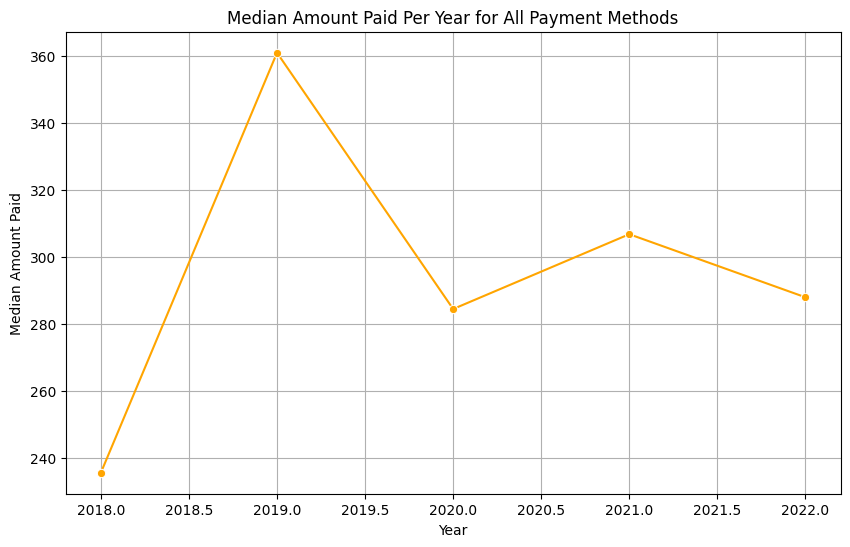

   year  amount_paid
0  2018        235.7
1  2019        360.9
2  2020        284.5
3  2021        306.8
4  2022        288.0


In [24]:
# Converting 'payment_date' to datetime format before extracting year
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'], errors='coerce')

# Check for NaT (if any invalid date formats exist)
invalid_dates_count = payment_df['payment_date'].isna().sum()
print(f"Number of invalid dates: {invalid_dates_count}")

# Drop rows with invalid dates if needed
payment_df = payment_df.dropna(subset=['payment_date'])

# Extract year from payment_date
payment_df['year'] = payment_df['payment_date'].dt.year

# Group by year and calculate median payment amount
median_payment_per_year = payment_df.groupby('year')['amount_paid'].median().reset_index()

# Plot median amount paid per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_payment_per_year, x='year', y='amount_paid', marker='o', color='orange')
plt.title('Median Amount Paid Per Year for All Payment Methods')
plt.xlabel('Year')
plt.ylabel('Median Amount Paid')
plt.grid()
plt.show()

# Display median payments per year
print(median_payment_per_year)


In [ ]:
############################################################## THE END #################################################################################